In [1]:
!pip install tensorflow keras numpy torch adversarial-robustness-toolbox

In [1]:
# Importing dependencies
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn
import torch
import keras
from keras.activations import get
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import FastGradientMethod
from art.utils import load_dataset


matplotlib.rcParams.update({"font.size": 14})


LOADING OUR DATA (MNIST FILE - which contains all hand drawn digits from 0-9)

In [3]:
(train_images, train_labels), (test_images, test_labels), min, max = load_dataset(name="mnist")

## Training a TensorFlow Keras model

In [4]:
def create_model():
    model = tf.keras.models.Sequential([
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
        MaxPool2D(pool_size=2),
        Conv2D(filters=64, kernel_size=3, activation="relu"),
        MaxPool2D(pool_size=2),
        Flatten(),        
        Dense(units=10, activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
        )
    return model

In [5]:
model = create_model()

model.fit(
    x=train_images, 
    y=train_labels, 
    epochs=10,
    batch_size=256)

c:\Users\palla\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.7708 - loss: 0.8317
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9708 - loss: 0.0991
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.9793 - loss: 0.0703
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.9837 - loss: 0.0539
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.9852 - loss: 0.0485
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.9868 - loss: 0.0437
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.9896 - loss: 0.0354
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9894 - loss: 0.0340
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.9902 - loss: 0.0314
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.9917 - loss: 0.0265


In [7]:

loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(clip_values=(0, 1), model=model, nb_classes=10, input_shape=(28, 28, 1), loss_object=loss_object,)

In [8]:
attack_fgsm = FastGradientMethod(
    estimator=classifier, 
    eps=0.3
    )

In [9]:
test_images_adv = attack_fgsm.generate(x=test_images)

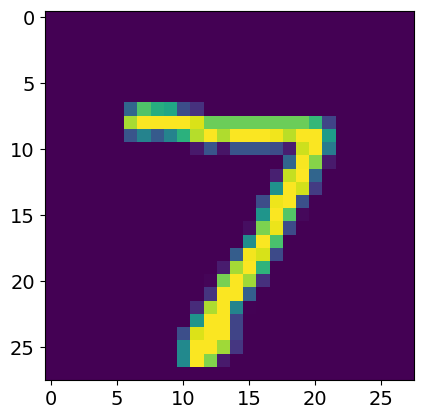

In [10]:
plt.imshow(test_images[0].squeeze())


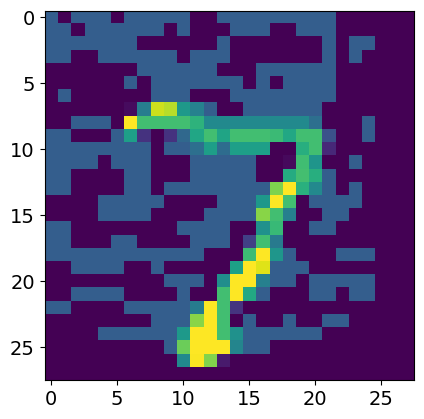

In [11]:
plt.imshow(test_images_adv[0].squeeze())


In [12]:
score_clean = model.evaluate(
    x=test_images, 
    y=test_labels
    )

score_adv = model.evaluate(
    x=test_images_adv, 
    y=test_labels
    )

print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

print(f"Clean test set accuracy: {score_clean[1]:.2f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9861 - loss: 0.0411
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0529 - loss: 6.2040
Clean test set loss: 0.03 vs adversarial set test loss: 6.01
Clean test set accuracy: 0.99 vs adversarial test set accuracy: 0.06


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9851 - loss: 0.0415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9779 - loss: 0.0551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9498 - loss: 0.1257
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8926 - loss: 0.2811
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8043 - loss: 0.5518
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6822 - loss: 0.9662
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5259 - loss: 1.5397
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3664 - loss: 2.2539
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2377 - loss: 3.0602
1/1 ━━━━━━━━━━━━━━━━

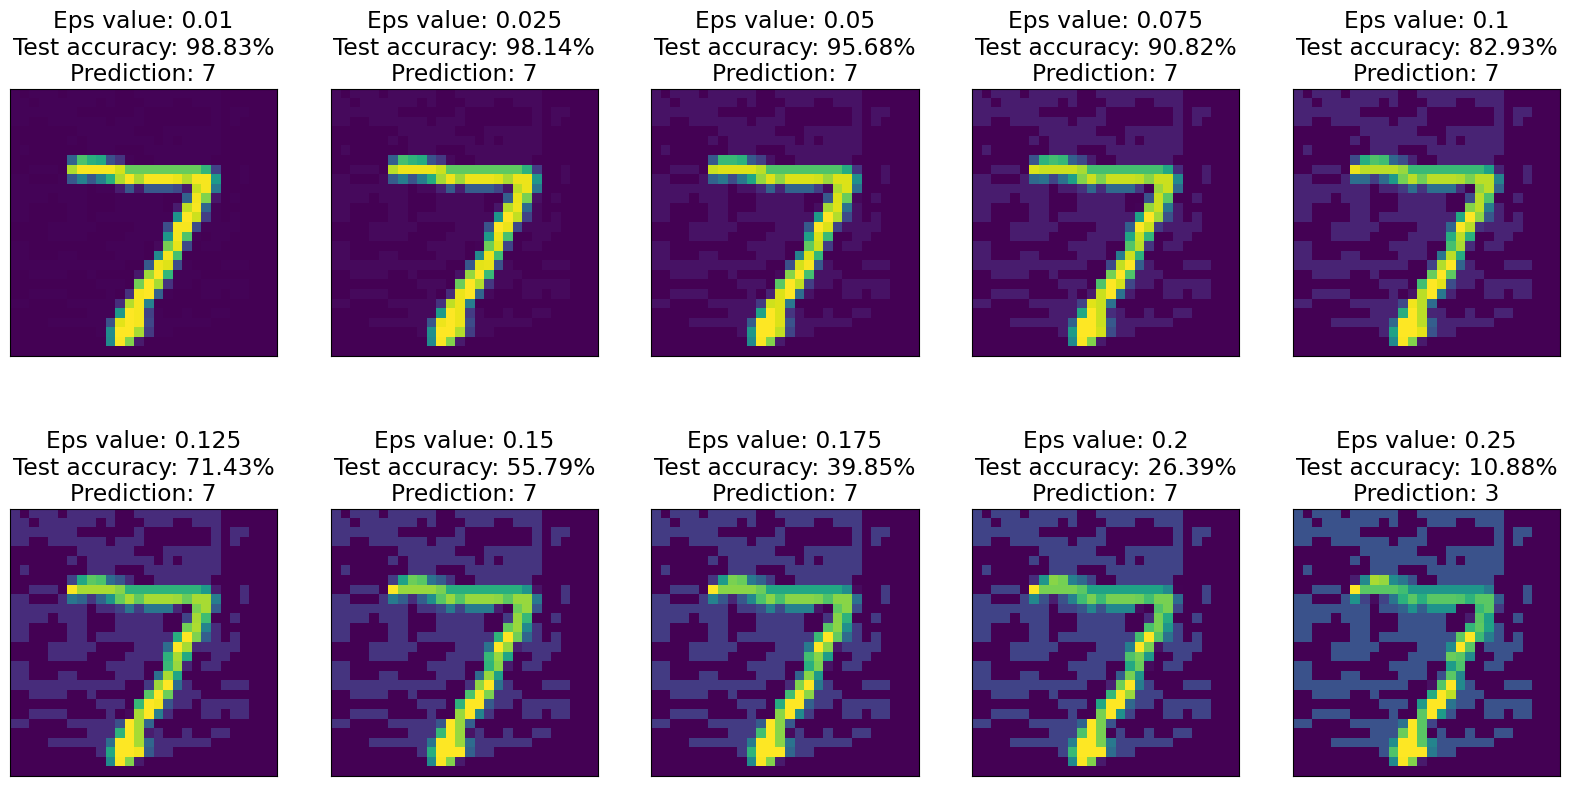

In [13]:
nrows, ncols = 2, 5
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )
eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

counter = 0

for i in range(nrows):
    for j in range(ncols):    
        attack_fgsm = FastGradientMethod(
            estimator=classifier, 
            eps=eps_to_try[counter]
            )

        test_images_adv = attack_fgsm.generate(x=test_images)

        axes[i, j].imshow(X=test_images_adv[0].squeeze())

        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        test_score = classifier._model.evaluate(
            x=test_images_adv, 
            y=test_labels
            )[1]
        prediction = np.argmax(model.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )

        counter += 1

plt.show()